In [114]:
# Use ! to run a terminal command

! pip3 install wavio 
! pip3 install librosa
! pip3 install sounddevice
! pip3 install pydub


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [115]:
# import necessary modules
import sounddevice as sd
from scipy.io import wavfile
import scipy
from scipy.signal import chirp, spectrogram
from scipy import signal 
from scipy.io.wavfile import write, read 
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
from pydub import AudioSegment
from pydub.playback import play
import math
from math import pi,cos,sin,tan,atan


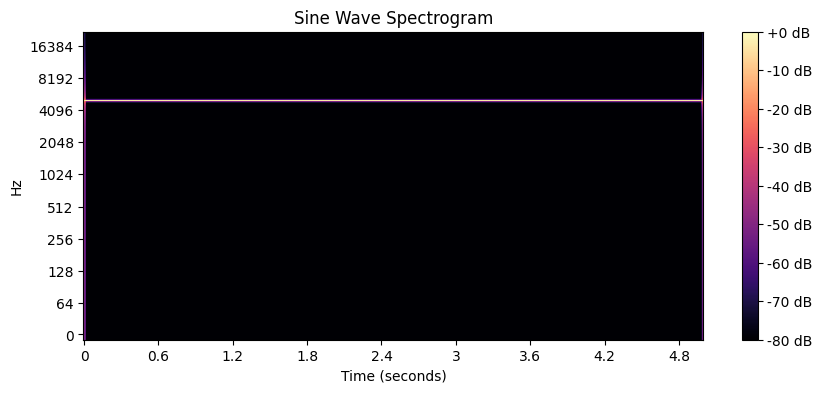

In [116]:
### Question 1

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

sr = 44100
DURATION = 5
FREQ = 5000

x1, tone1 = generate_sine_wave(FREQ, sr, DURATION)

t = np.linspace(0, DURATION, sr * DURATION) 
y = np.sin(FREQ * 2 * np.pi * t)   
m = np.max(np.abs(y))
maxint16 = np.iinfo(np.int16).max 
y = maxint16 * y / m
y = y.astype(np.int16) 

sd.play(y, sr)
sd.wait() 

wavfile.write('team_VN_SK_sinetone.wav', sr, y)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(tone1)), ref=np.max), sr=sr, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Sine Wave Spectrogram')
plt.show()


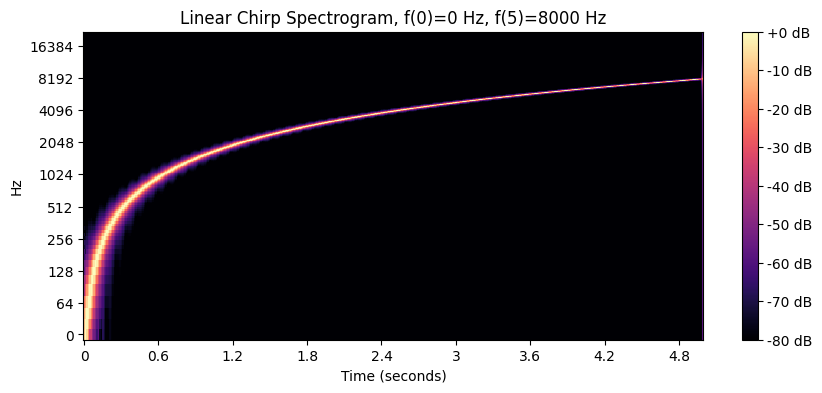

In [117]:
### Question 2

sr = 44100
duration = 5
time = (np.linspace(0, duration, int(sr*duration)))*0.5
frequency = np.linspace(0, 8000, len(time))
linear_chirp = np.sin(2 * np.pi * frequency * time)

sd.play(linear_chirp, sr)
sd.wait() 

wavfile.write('team_VN_SK_chirp.wav', sr, linear_chirp)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(linear_chirp)), ref=np.max), sr=sr, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear Chirp Spectrogram, f(0)=0 Hz, f(5)=8000 Hz')
plt.show()


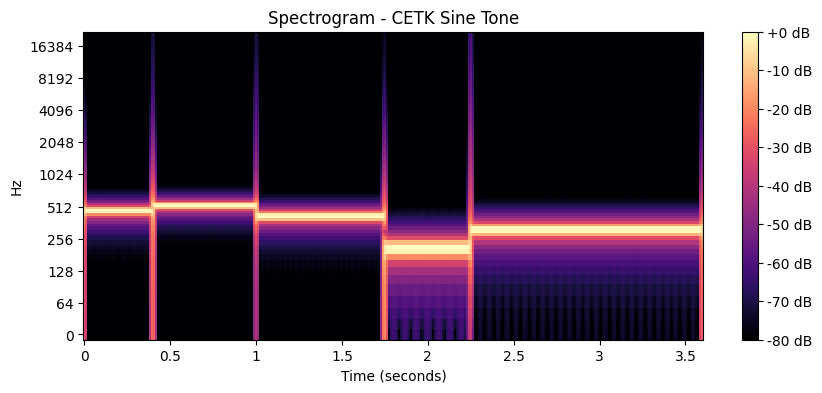

In [118]:
## Question 3

sr = 44100 

tone_durations = [0.4, 0.6, 0.75, 0.5, 1.35]  
frequencies = [466.16, 523.25, 415.30, 207.65, 311.13]
CETK_signal = np.array([])

for freq, tone_duration in zip(frequencies, tone_durations):
    t = np.linspace(0, tone_duration, int(sr * tone_duration), endpoint=False)
    tone = np.sin(2 * np.pi * freq * t)
    CETK_signal = np.concatenate([CETK_signal, tone])

sd.play(CETK_signal, sr)
sd.wait() 

wavfile.write("team_VN_SK_cetk.wav", sr, (CETK_signal * 32767).astype(np.int16))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(CETK_signal)), ref=np.max), sr=sr, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - CETK Sine Tone')
plt.show()


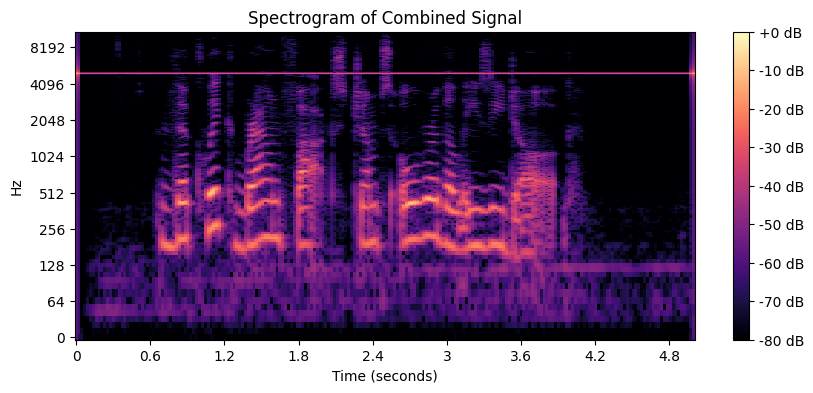

In [132]:
## Question 4

fs_speech, speech_data = wavfile.read("The quick brown fox jumps over the lazy dog.wav")

duration = len(speech_data) / fs_speech
t = np.linspace(0, duration, len(speech_data))
sine_tone = np.sin(2 * np.pi * 5000 * t)
combined_signal = speech_data + sine_tone

sd.play(combined_signal, fs_speech)
sd.wait() 

wavfile.write("team_VN_SK_speechchirp.wav", fs_speech, combined_signal)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(combined_signal)), ref=np.max), y_axis='log', x_axis='s', sr=fs_speech)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Combined Signal')
plt.show()


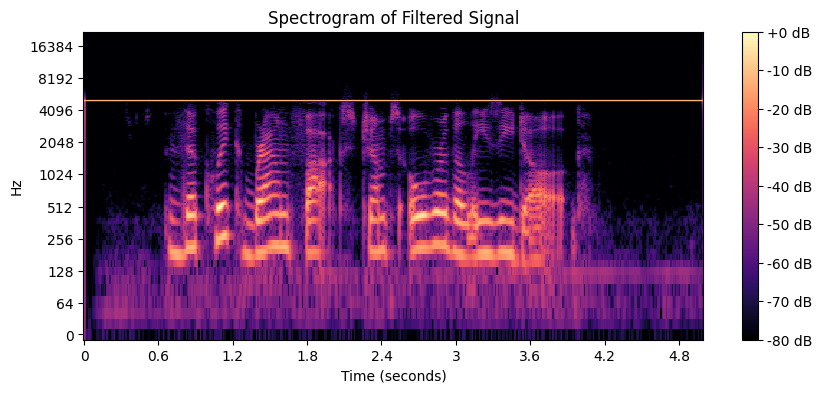

In [133]:
## Question 5

y1, sr = librosa.load('team_VN_SK_speechchirp.wav', sr=44100, mono=True)
cutoff_frequency = 4000  
nyquist_frequency = 0.5 * sr
normalized_cutoff = cutoff_frequency / nyquist_frequency

b, a = signal.butter(8, normalized_cutoff, btype='low')
filtered_signal = signal.lfilter(b, a, y1)

sd.play(filtered_signal, sr)
sd.wait() 

write('team_VN_SK_filteredspeechsine.wav', sr, np.int16(filtered_signal * 32767))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(filtered_signal)), ref=np.max), sr=sr, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Filtered Signal')
plt.show()

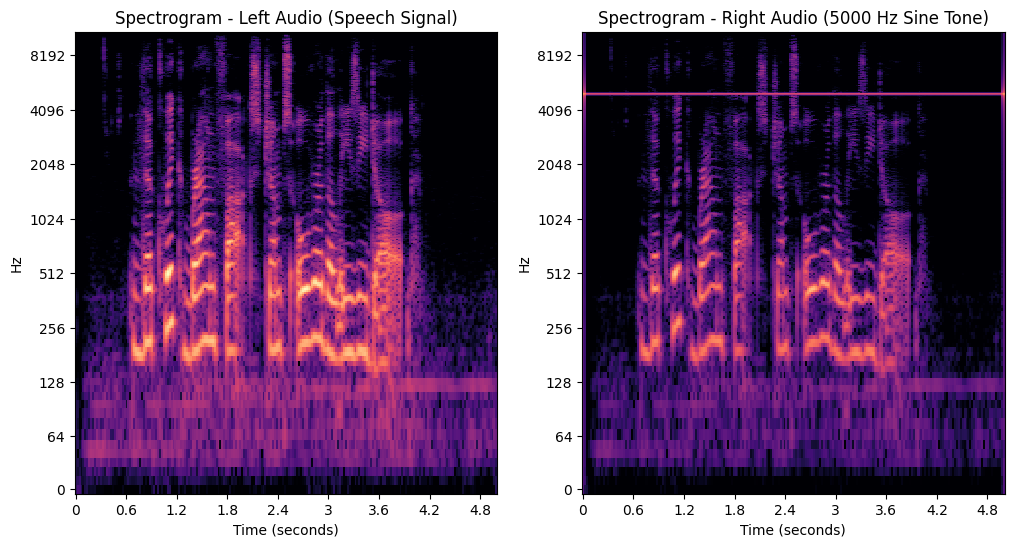

In [121]:
### Question 6

fs_speech, speech_data = wavfile.read("The quick brown fox jumps over the lazy dog.wav")

duration = len(speech_data) / fs_speech
t = np.linspace(0, duration, len(speech_data), endpoint=False)
sine_tone = np.sin(2 * np.pi * 5000 * t)
stereo_signal = np.column_stack((speech_data, speech_data + sine_tone))

sd.play(stereo_signal, fs_speech)
sd.wait() 

write('team_VN_SK_stereospeechsine.wav', fs_speech, stereo_signal)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(stereo_signal[:,0])), ref=np.max), sr=fs_speech, x_axis='s', y_axis='log')
plt.title('Spectrogram - Left Audio (Speech Signal)')
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(stereo_signal[:,1])), ref=np.max), sr=fs_speech, x_axis='s', y_axis='log')
plt.title('Spectrogram - Right Audio (5000 Hz Sine Tone)')
plt.show()